In [46]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [47]:
train_data = pd.read_csv('a.csv')
i = pd.read_csv('../competitive-data-science-predict-future-sales/shops.csv')
test_data = pd.read_csv('../competitive-data-science-predict-future-sales/test.csv')

In [48]:
obj_dtypes = ['date', 'item_name', 'item_category_name', 'shop_name', 'city']
for col in obj_dtypes:
    train_data[col] = train_data[col].astype('category')
train_data.dtypes


Unnamed: 0                       int64
date                          category
date__month                      int64
shop_id                          int64
item_id                          int64
                                ...   
amt_weekends_month_lag_-1      float64
amt_free_days_month_lag_1      float64
amt_free_days_month_lag_2      float64
amt_free_days_month_lag_12     float64
amt_free_days_month_lag_-1     float64
Length: 71, dtype: object

In [50]:
print(train_data.columns, len(train_data.columns))

Index(['Unnamed: 0', 'date', 'date__month', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_category_id', 'item_name', 'item_category_name',
       'shop_name', 'date__day', 'date__week', 'date__day_of_month',
       'date__day_of_week', 'date__week_of_year', 'date__month_of_year',
       'date__year', 'category_cnt_month', 'category_cnt_year',
       'shop_category_cnt_year', 'shop_category_cnt_month',
       'avg_monthly_sales', 'category_monthly_avg_sales',
       'shop_monthly_avg_sales', 'is_weekend', 'is_holiday',
       'holidays_in_month', 'amt_weekends_month', 'item_cnt_month',
       'item_cnt_week', 'item_cnt_year', 'city', 'shop_age_months',
       'amt_free_days_month', 'item_cnt_month_lag_1', 'item_cnt_month_lag_2',
       'item_cnt_month_lag_12', 'item_cnt_month_lag_-1',
       'category_cnt_month_lag_1', 'category_cnt_month_lag_2',
       'category_cnt_month_lag_12', 'category_cnt_month_lag_-1',
       'shop_category_cnt_month_lag_1', 'shop_category_cnt

In [51]:
for name in train_data.columns:
    if train_data[f'{name}'].dtype == object:
        print(name)

In [52]:
test_data['item_cnt_month'] = [0 for i in range(len(test_data.values))]

In [54]:
train_data = train_data.drop(['Unnamed: 0'], axis = 1)


In [55]:
train_data.dtypes

date                          category
date__month                      int64
shop_id                          int64
item_id                          int64
item_price                     float64
                                ...   
amt_weekends_month_lag_-1      float64
amt_free_days_month_lag_1      float64
amt_free_days_month_lag_2      float64
amt_free_days_month_lag_12     float64
amt_free_days_month_lag_-1     float64
Length: 70, dtype: object

In [56]:
X_train = train_data.drop(columns=['item_cnt_month'])
y_train = train_data['item_cnt_month']

In [57]:
missing_columns = set(X_train.columns) - set(test_data.columns)
print("Признаки, которых не хватает в тесте:", missing_columns)

Признаки, которых не хватает в тесте: {'shop_monthly_avg_sales_lag_2', 'item_cnt_month_lag_12', 'shop_category_cnt_month_lag_12', 'date__day', 'amt_weekends_month', 'category_monthly_avg_sales_lag_12', 'holidays_in_month_lag_1', 'shop_monthly_avg_sales_lag_-1', 'date', 'shop_monthly_avg_sales_lag_12', 'shop_name', 'category_cnt_month_lag_-1', 'item_price', 'amt_free_days_month_lag_1', 'category_cnt_month', 'item_category_id', 'amt_weekends_month_lag_2', 'holidays_in_month_lag_2', 'category_monthly_avg_sales_lag_-1', 'amt_free_days_month_lag_-1', 'shop_category_cnt_month', 'amt_free_days_month', 'avg_monthly_sales_lag_12', 'category_cnt_month_lag_2', 'date__day_of_week', 'date__day_of_month', 'date__year', 'avg_monthly_sales', 'shop_age_months', 'avg_monthly_sales_lag_2', 'holidays_in_month_lag_12', 'holidays_in_month_lag_-1', 'category_monthly_avg_sales', 'shop_category_cnt_year', 'item_cnt_week', 'is_holiday', 'avg_monthly_sales_lag_1', 'shop_category_cnt_month_lag_2', 'shop_monthly_a

In [58]:
X_test = test_data.copy()

In [59]:
train_data.dtypes

date                          category
date__month                      int64
shop_id                          int64
item_id                          int64
item_price                     float64
                                ...   
amt_weekends_month_lag_-1      float64
amt_free_days_month_lag_1      float64
amt_free_days_month_lag_2      float64
amt_free_days_month_lag_12     float64
amt_free_days_month_lag_-1     float64
Length: 70, dtype: object

In [60]:
train_data['avg_monthly_sales'] = train_data['avg_monthly_sales'].replace([np.inf, -np.inf], np.nan)
train_data.describe()


,date__month,shop_id,item_id,item_price,item_cnt_day,item_category_id,date__day,date__week,date__day_of_month,date__day_of_week,...,holidays_in_month_lag_12,holidays_in_month_lag_-1,amt_weekends_month_lag_1,amt_weekends_month_lag_2,amt_weekends_month_lag_12,amt_weekends_month_lag_-1,amt_free_days_month_lag_1,amt_free_days_month_lag_2,amt_free_days_month_lag_12,amt_free_days_month_lag_-1
count,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,1.066138e+06,...,484194.000000,964801.000000,964801.000000,884442.000000,484194.000000,964801.000000,964801.000000,884442.000000,484194.000000,964801.000000
mean,1.937746e+01,3.037581e+01,9.373190e+03,9.193812e+02,1.138909e+00,4.020090e+01,6.037005e+02,8.579101e+01,1.609792e+01,3.330432e+00,...,1.298234,1.116621,8.697622,8.695719,8.694672,8.706265,9.895147,9.923609,9.992906,9.822886
std,9.160330e+00,1.555579e+01,6.153019e+03,8.943454e+02,4.788792e-01,1.820025e+01,2.787880e+02,3.982778e+01,8.913809e+00,2.004361e+00,...,2.327434,2.156543,0.802339,0.800977,0.792383,0.797910,2.383870,2.404302,2.416739,2.324166
min,0.000000e+00,2.000000e+00,3.000000e+01,2.500000e+01,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
25%,1.200000e+01,1.900000e+01,4.052000e+03,2.990000e+02,1.000000e+00,2.800000e+01,3.830000e+02,5.400000e+01,8.000000e+00,2.000000e+00,...,0.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,2.100000e+01,3.100000e+01,7.790000e+03,5.990000e+02,1.000000e+00,3.800000e+01,6.530000e+02,9.300000e+01,1.600000e+01,4.000000e+00,...,1.000000,0.000000,8.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000
75%,2.700000e+01,4.400000e+01,1.503100e+04,1.199000e+03,1.000000e+00,5.500000e+01,8.300000e+02,1.180000e+02,2.400000e+01,5.000000e+00,...,1.000000,1.000000,9.000000,9.000000,9.000000,9.000000,11.000000,11.000000,11.000000,10.000000
max,3.300000e+01,5.900000e+01,2.216700e+04,5.990000e+03,5.000000e+00,8.300000e+01,1.033000e+03,1.470000e+02,3.100000e+01,6.000000e+00,...,8.000000,8.000000,10.000000,10.000000,10.000000,10.000000,17.000000,17.000000,17.000000,17.000000


In [61]:
train_data['avg_monthly_sales'].min()

28917.666666666668

In [62]:
# train_data = train_data.drop(['inf'], axis = 1)

In [63]:
for col in list(train_data.columns):
    print(col)
    train_data[f'{col}'] = train_data[f'{col}'].replace([np.inf, -np.inf], np.nan)


date
date__month
shop_id
item_id
item_price
item_cnt_day
item_category_id
item_name
item_category_name
shop_name
date__day
date__week
date__day_of_month
date__day_of_week
date__week_of_year
date__month_of_year
date__year
category_cnt_month
category_cnt_year
shop_category_cnt_year
shop_category_cnt_month
avg_monthly_sales
category_monthly_avg_sales
shop_monthly_avg_sales
is_weekend
is_holiday
holidays_in_month
amt_weekends_month
item_cnt_month
item_cnt_week
item_cnt_year
city
shop_age_months
amt_free_days_month
item_cnt_month_lag_1
item_cnt_month_lag_2
item_cnt_month_lag_12
item_cnt_month_lag_-1
category_cnt_month_lag_1
category_cnt_month_lag_2
category_cnt_month_lag_12
category_cnt_month_lag_-1
shop_category_cnt_month_lag_1
shop_category_cnt_month_lag_2
shop_category_cnt_month_lag_12
shop_category_cnt_month_lag_-1
avg_monthly_sales_lag_1
avg_monthly_sales_lag_2
avg_monthly_sales_lag_12
avg_monthly_sales_lag_-1
category_monthly_avg_sales_lag_1
category_monthly_avg_sales_lag_2
category_m

In [64]:
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='rmse',
    early_stopping_rounds=10,
    enable_categorical = True,
)


In [65]:

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


In [66]:
model.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    verbose=True
)


[0]	validation_0-rmse:6.66800
[1]	validation_0-rmse:6.03181
[2]	validation_0-rmse:5.45839
[3]	validation_0-rmse:4.94296
[4]	validation_0-rmse:4.47925
[5]	validation_0-rmse:4.06637
[6]	validation_0-rmse:3.69604
[7]	validation_0-rmse:3.36816
[8]	validation_0-rmse:3.07454
[9]	validation_0-rmse:2.81500
[10]	validation_0-rmse:2.58222
[11]	validation_0-rmse:2.37538
[12]	validation_0-rmse:2.19240
[13]	validation_0-rmse:2.04215
[14]	validation_0-rmse:1.90206
[15]	validation_0-rmse:1.77740
[16]	validation_0-rmse:1.66960
[17]	validation_0-rmse:1.57744
[18]	validation_0-rmse:1.49745
[19]	validation_0-rmse:1.42995
[20]	validation_0-rmse:1.36966
[21]	validation_0-rmse:1.31981
[22]	validation_0-rmse:1.27727
[23]	validation_0-rmse:1.24106
[24]	validation_0-rmse:1.21085
[25]	validation_0-rmse:1.18359
[26]	validation_0-rmse:1.16190
[27]	validation_0-rmse:1.14333
[28]	validation_0-rmse:1.12752
[29]	validation_0-rmse:1.11361
[30]	validation_0-rmse:1.10188
[31]	validation_0-rmse:1.09165
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=10,
             enable_categorical=True, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [67]:
y_pred = model.predict(X_val_split)
rmse = mean_squared_error(y_val_split, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.85225381950548


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [81]:

y_pred = model.predict(X_val_split)
y_pred
# y_pred = pd.DataFrame(y_pred)
# y_pred = y_pred.round()

# y_pred


array([1.9316926, 1.9810028, 1.9986278, ..., 3.9901743, 3.4110427,
       1.0424569], dtype=float32)

In [85]:
rounded_values = [round(value) for value in y_pred]
rmse = mean_squared_error(y_val_split, rounded_values, squared=False)
print("RMSE:", rmse)


RMSE: 0.8603750249509701


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [86]:
y_val_split

685649    2.0
784791    2.0
481309    2.0
76242     1.0
802474    3.0
         ... 
321661    1.0
124487    1.0
766133    4.0
284126    3.0
350968    1.0
Name: item_cnt_month, Length: 213228, dtype: float64

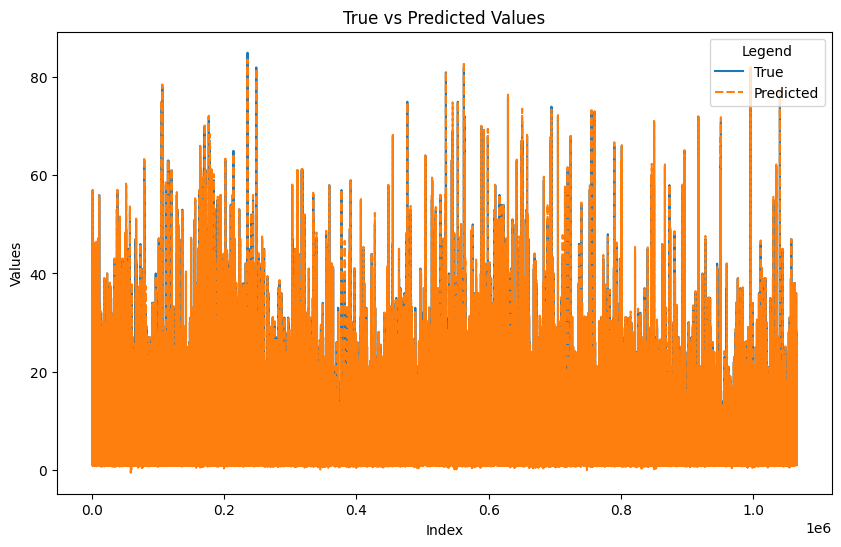

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Пример данных
true_values = y_val_split
predicted_values = y_pred

# Создаем DataFrame для удобства работы
df_comparison = pd.DataFrame({
    'True': true_values,
    'Predicted': predicted_values
})

# Создаем график для сравнения
plt.figure(figsize=(10, 6))

# Строим линейный график
sns.lineplot(data=df_comparison)
plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')

# Добавляем легенду
plt.legend(title='Legend')

plt.show()


In [94]:
from scipy.special import kl_div

hist_true, bin_edges_true = np.histogram(true_values, bins=10, density=True)
hist_pred, bin_edges_pred = np.histogram(predicted_values, bins=10, density=True)

# Вычисляем КЛ дивергенцию для двух распределений
kl_divergence = np.sum(kl_div(hist_true + 1e-10, hist_pred + 1e-10))  # Добавляем небольшие числа для предотвращения деления на 0

print(f"KL дивергенция между истинными и предсказанными распределениями: {kl_divergence}")

kl_divergence = np.sum(kl_div(hist_pred + 1e-10, hist_true + 1e-10))  # Добавляем небольшие числа для предотвращения деления на 0

print(f"KL дивергенция между истинными и предсказанными распределениями: {kl_divergence}")



KL дивергенция между истинными и предсказанными распределениями: 0.0009101321475531906
KL дивергенция между истинными и предсказанными распределениями: 0.0009961645131199277
